## Exercice 12  : Figures récursives
On peut décrire la figure suivante de façon récursive :

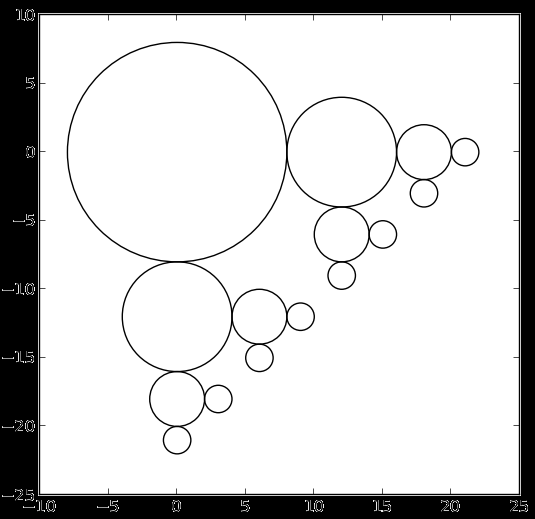

La figure est formée d’un cercle et de deux copies de ce cercle ayant subies une réduction d’un facteur 2, ces deux petits cercles étant tangents extérieurement au cercle initial et tels que les lignes des centres sont parallèles aux axes du repère. Ces deux petits cercles deviennent à leur tour “cercle initial” pour poursuivre la figure.

On peut traduire avec python ce descriptif récursif de la façon suivante :

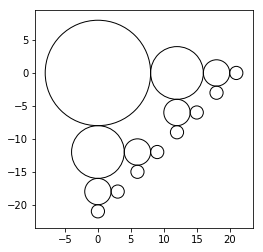

In [8]:
import pylab
F = pylab.gca() # F peut être vue comme un objet ’figure’
 
def cercle(x, y, r):
   """ cercle de centre (x,y) et de rayon r """
   # création du cercle:
   cir = pylab.Circle([x, y], radius = r, fill = False)
   # ajout du cercle à la figure :
   F.add_patch(cir)
 
def CerclesRec(x, y, r):
   """ construction récursive de la figure """
   cercle(x, y, r)
   if r > 1:
      CerclesRec(x+3*r/2, y, r/2)
      CerclesRec(x, y-3*r/2, r/2)
 
# appel de la fonction CerclesRec
CerclesRec(0, 0, 8)
 
# pour placer toute la figure dans un repère orthonormé :
pylab.axis('scaled')
# affichage de la figure :
pylab.show()

1) Quelle est la condition d'arret ?

**Réponse :** on s'arrête quand $r \le 1$

2) Qu’est ce qui garantit que cette fonction ne s’appellera qu’un nombre fini de fois ?

**Réponse :** La valeur de *r* diminue (r/2), il finira donc par passer en dessous de 1

3) Dans l’appel initial, si l’on change CerclesRec(0, 0, 8)  par CerclesRec(0, 0, 64), qu’obtiendra-t-on ?

**Réponse :** On obtiendra 2 lignes de plus de cercles

4) Modifier le programme python précédent pour obtenir la figure suivante :

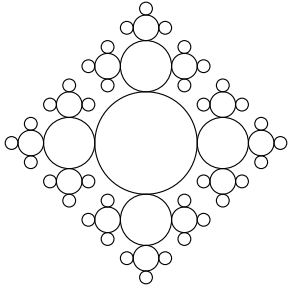

On pourra utiliser un paramètre supplémentaire pour définir la fonction récursive (abscisse du centre, ordonnée du centre, rayon du cercle, position du voisin) où position sera l’une des chaînes de caractères : haut, bas, droite, gauche.

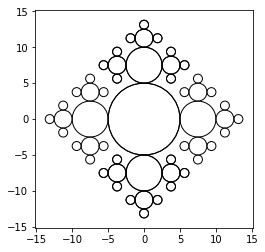

In [4]:
import pylab
F = pylab.gca() # F peut être vue comme un objet ’figure’
 
def cercle(x, y, r):
   """ cercle de centre (x,y) et de rayon r """
   # création du cercle:
   cir = pylab.Circle([x, y], radius = r, fill = False)
   # ajout du cercle à la figure :
   F.add_patch(cir)
 
def CerclesCar(x, y, r,pos):
    """ construction récursive de la figure """
    cercle(x, y, r)
    if r > 1 and pos == 'droite':
        CerclesCar(x+3*r/2, y, r/2,'droite')
        CerclesCar(x, y-3*r/2, r/2,'bas')
        CerclesCar(x, y+3*r/2, r/2,'haut')
    if r > 1 and pos == 'gauche':
        CerclesCar(x-3*r/2, y, r/2,'gauche')
        CerclesCar(x, y-3*r/2, r/2,'bas')
        CerclesCar(x, y+3*r/2, r/2,'haut')
    if r > 1 and pos == 'bas':
        CerclesCar(x+3*r/2, y, r/2,'droite')
        CerclesCar(x-3*r/2, y, r/2,'gauche')
        CerclesCar(x, y-3*r/2, r/2,'bas')
    if r > 1 and pos == 'haut':
        CerclesCar(x+3*r/2, y, r/2,'droite')
        CerclesCar(x-3*r/2, y, r/2,'gauche')
        CerclesCar(x, y+3*r/2, r/2,'haut')
 
# appel de la fonction CerclesRec
CerclesCar(0, 0, 5,'droite')
CerclesCar(0, 0, 5,'gauche')
 
# pour placer toute la figure dans un repère orthonormé :
pylab.axis('scaled')
# affichage de la figure :
pylab.show()

5) Écrire un programme récursif pour la figure dont on donne deux étapes ci-dessous :

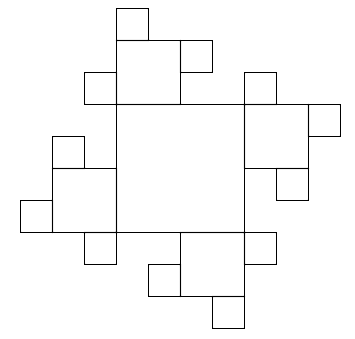

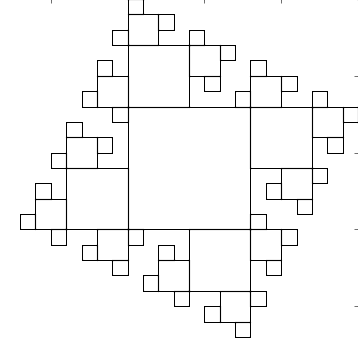

pylab.Rectangle((x,y),a,b, fill =False)  permet de définir un rectangle dont les côtés, de longueurs a  et b , sont parallèles aux axes et dont le sommet “sud-ouest” a pour coordonnées (x,y) .


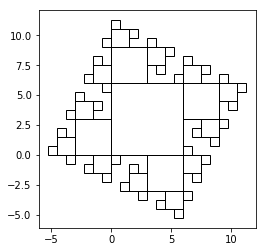

In [2]:
import pylab
F = pylab.gca() # F peut être vue comme un objet ’figure’
 
def Rectangle(x, y, a,b):
    """ cercle de centre (x,y) et de rayon r """
   # création du cercle:
    cir = pylab.Rectangle((x,y),a,b, fill =False)
   # ajout du cercle à la figure :
    F.add_patch(cir)
    
def RectangleRec(x, y, a,b,direction="no"):
    """ construction récursive de la figure """
    Rectangle(x, y, a,b)
    if a>1 and b>1:
        if direction=="droite":
            RectangleRec(x+a,b/2+y,a/2,b/2,"droite")
            RectangleRec(x,y+b,a/2,b/2,"haut")
            RectangleRec(x+a/2,y-b/2,a/2,b/2,"bas") 
        if direction=="haut":
            RectangleRec(x+a,b/2+y,a/2,b/2,"droite")
            RectangleRec(x,y+b,a/2,b/2,"haut")
            RectangleRec(x-a/2,y,a/2,b/2,"gauche")
        if direction=="bas":
            RectangleRec(x+a/2,y-b/2,a/2,b/2,"bas")
            RectangleRec(x+a,b/2+y,a/2,b/2,"droite")
            RectangleRec(x-a/2,y,a/2,b/2,"gauche")
        if direction=="gauche":
            RectangleRec(x,y+b,a/2,b/2,"haut")
            RectangleRec(x-a/2,y,a/2,b/2,"gauche")
            RectangleRec(x+a/2,y-b/2,a/2,b/2,"bas")
        elif direction=="no":
            RectangleRec(x,y+b,a/2,b/2,"haut")
            RectangleRec(x+a,b/2+y,a/2,b/2,"droite")
            RectangleRec(x-a/2,y,a/2,b/2,"gauche")
            RectangleRec(x+a/2,y-b/2,a/2,b/2,"bas")
# appel de la fonction CerclesRec
RectangleRec(0,0, 6,6,)
 
# pour placer toute la figure dans un repère orthonormé :
pylab.axis('scaled')
# affichage de la figure :
pylab.show()

6) Écrire un programme récursif python pour la figure dont on donne deux étapes ci-dessous :

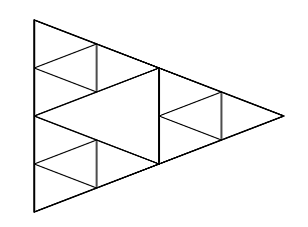

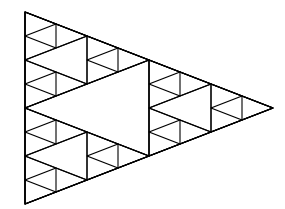

pylab.Polygon([(xa,ya),(xb,yb),(xc,yc)], fill =False)  permet de définir un triangle dont les sommets ont pour coordonnées (xa,ya) , (xb,yb) , (xc,yc) .

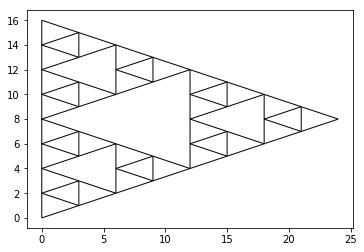

In [3]:
import pylab
F = pylab.gca() # F peut être vue comme un objet ’figure’
 
def Triangle(xa,ya, xb,yb, xc,yc):
    """ cercle de centre (x,y) et de rayon r """
   # création du cercle:
    cir = pylab.Polygon([(xa,ya),(xb,yb),(xc,yc)], fill =False)
   # ajout du cercle à la figure :
    F.add_patch(cir)
    
def TriangleRec(xa,ya, xb,yb, xc,yc,nb=1):
    """ construction récursive de la figure """
    Triangle(xa,ya, xb,yb, xc,yc,)
    Triangle(xb,yb,xa,yb+2,xc,yb+1)
    Triangle(xc,yc,xc,yb+1,xc+3,yb)
    if nb==1:
        TriangleRec(xa,ya+4,xb,yb+4,xc,yc+4,2)
        TriangleRec(xc+3,yb,xc+3,yb+2,xc+6,yc+2,2)
def TriangleRec1(xa,ya,xb,yb,xc,yc,nb=2):
    TriangleRec(xa,ya,xb,yb,xc,yc)
    TriangleRec(xa,ya+8,xb,yb+8,xc,yc+8)
    TriangleRec(xa+12,ya+4,xb+12,yb+4,xc+12,yc+4)
        
# appel de la fonction CerclesRec
TriangleRec1(0,0, 0,2, 3,1)
 
# pour placer toute la figure dans un repère orthonormé :
pylab.axis('scaled')
# affichage de la figure :
pylab.show()